 # Feature Reduction: PCA

<img src="IMG/workflow.png" width=1200>

<img src="IMG/cluster_flow.png" width=900>

#### Problem:  very high dimensional input space, but very sparse sampling 
* not enough training data
* computational complexity

## Outline
* Motivation
* Linear Reduction: Principal Component Analysis (PCA)
* Non-Linear Reduction: Kernel-PCA
* reduction for visualization: t-SNE

## Principal Component Analysis (PCA)
#### *Linear (Feature) Space Reduction*
#### Tasks:
* find smaller (more compact) prepresentation of data -> find sub-spaces
* allow loss-less and lossly *compression*
* linear de-correlation 


### Motivation
#### 2D Toy Example
<img src="IMG/pca_1.png" width=400>

#### Finding a more *compact* representation -> new coordinate system
<img src="IMG/pca_2.png" width=400>

#### Optimization Criteria
<img src="IMG/pca_3.png" width=400>

* de-correlation
* preserve high variance

#### Optimization Criteria 
<img src="IMG/pca_4.png" width=400>

* minimize reconstruction error for lossly *compression* -> reducing dimensionality 

### Excursion I: Co-Variance

***covariance*** is a measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive:

$ cov(x,y) := {1\over n}\sum_i^n(x_i-\bar{x})(y_i-\bar{y})$

-> ***Notation***  mean: $\bar{x}$, variance: $\sigma_X$ 

#### Co-Variance and  Correlation 
The most familiar measure of dependence between two quantities is the **Pearsoncorrelation coefficient**, It is obtained by dividing the covariance of the two variables by the product of their standard deviations.

$corr(X,Y) := {cov(X,Y)\over {\sigma_X\sigma_Y}}$

#### Covariance Matrix
In probability theory and statistics, a covariance matrix (often named $K_{XX}$ or $\Sigma$) is a matrix whose element in the $i, j$ position is the covariance between the $i$-th and $j$-th elements of a random vector $X$:
<img SRC="IMG/cov_mat.svg"><br><br>
where $E[X]$ is the expected value (mean)

### Excursion II: Changing the Basis of a Vector Space

#### Definition:
a **set** B of elements (**vectors**) in a **vector space** $V$ is called a **basis**, if every element of $V$ may be written in a unique way as a (finite) **linear combination** of elements of B. The coefficients of this linear combination are referred to as components or **coordinates** on B of the vector. The elements of a basis are called basis vectors [wikipedia].

#### Simple Example:
In $\mathbb{R}^2$, the ***eucledian*** basis is the set of the two vectors $\vec{e_0} := (1,0)^T, \vec{e_1} := (0,1)^T$.
    
Every point $\vec{p}:=(p_0,p_1) \in \mathbb{R}^2$ can be expressed by it's **coordinates** $x,y$ in the form of $p_0:=x\vec{e_0}$ and $p_1:=y\vec{e_1}$   

<img src="IMG/basis1.png">

#### Alternative Basis
The basis of vector space is not unique: it is very easy to find new sets of basis vectors.  

<img src="IMG/basis2.png">

#### Optional Properties of Basis Sets
* othortogonal
* orthonormal 

#### Changing the Basis


## Eigen Decomposition

One of the re-accuring questions is: how to find the **"best"** basis for a given problem/data. Decomposition into ***Eigen Values*** and ***Eigen Vectors*** provide a comon solution:

#### Definition
An eigenvector of a linear transformation $T$ is a non-zero vector that changes by only a scalar factor when that linear transformation is applied to it. This condition can be written as:

$ T(\mathbf {v} )=\lambda \mathbf {v} $

where $\lambda$ is a scalar, known as the ***eigenvalue*** associated with the ***eigenvector*** v.

If the vector space $V$ is finite-dimensional, then the linear transformation $T$ can be represented as a **square matrix $A$** , and the vector $v$ by a **column vector**, rendering the above mapping as a matrix multiplication on the left-hand side and a scaling of the column vector on the right-hand side in the equation [wikipedia]

$ A\mathbf {v} =\lambda \mathbf {v}$ 

#### Eigen Decomposition
for a squared, diagonizable matrix $M$ of size $n \times n$:

* we can find $n$ **eigen vectors** $q_i$ with **eigen values** $\lambda_i$ 

* we can decompose $M$ into $M = Q \Lambda Q^{-1} $
    * where $Q$ is a matrix of the eigenvectors
    * $\Lambda$ a diagonal matrix with the $\lambda_i$ on the diagonal

#### Intuition
* Number of non zero eigenvalues gives the "intrinsic dimension/rank" of the data
* Eigenvectors form **new basis**

In [4]:
import numpy as np
#a numpy example
A=np.diag((1, 1, 0))
A

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [5]:
v,V=np.linalg.eig(A)
print(v)

[1. 1. 0.]


In [6]:
print(V)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [7]:
#a bit more complex example
A=np.array([[1,1,0,0],[3,3,0,0],[2,2,0,0],[4,4,0,0]])
v,V=np.linalg.eig(A)

In [8]:
v

array([0., 0., 0., 4.])

In [9]:
V

array([[ 0.        ,  0.        , -0.70710678, -0.18257419],
       [ 0.        ,  0.        ,  0.70710678, -0.54772256],
       [ 1.        ,  0.        ,  0.        , -0.36514837],
       [ 0.        ,  1.        ,  0.        , -0.73029674]])

In [10]:
v[3]*V[3,:]

array([ 0.        ,  4.        ,  0.        , -2.92118697])

#### Problems with Eigen Decompositions 
* only for diagonizable, quared marticies
* but, matricies hoding data are usually not square (more data samples than data dimensions)

## Singular Value Decomposition

#### Definition [wikipedia]: 
Suppose $M$ is a $m \times n$ matrix whose entries come from the field of real numbers or the field of complex numbers. Then there exists a factorization, called a **singular value decomposition** of $M$, of the form

$ \mathbf {M} =\mathbf {U} {\boldsymbol {\Sigma }}\mathbf {V} ^{*}$

where

* $U$ is an $m \times m$ unitary ($U^*U=I$) matrix,
* $\Sigma$ is a diagonal $m \times n$ matrix with non-negative real numbers, the **singular values**, on the diagonal,
* $V$ is an $n \times n$ unitary matrix, and $V^∗$ is the conjugate transpose of $V$.



**Intuition:** $M$ is an $m \times$ m real square matrix with positive determinant: $U, V^*$, and $\Sigma$ are real $m \times m$ matrices as well. $\Sigma$ can be regarded as a **scaling** matrix, and $U, V^∗$ can be viewed as **rotation** matrices [wikipedia]:

<img src="IMG/svg.png" width=500>

In [11]:
#example 
M = np.array([ [1, 0, 0, 0], [0,0,0,2], [0,3,0,0], [0,0,0,0], [2,0,0,0] ])
print(M)
U,S,V = np.linalg.svd(M)

[[1 0 0 0]
 [0 0 0 2]
 [0 3 0 0]
 [0 0 0 0]
 [2 0 0 0]]


In [12]:
U

array([[ 0.        , -0.4472136 ,  0.        ,  0.        , -0.89442719],
       [ 0.        ,  0.        , -1.        ,  0.        ,  0.        ],
       [-1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        , -0.89442719,  0.        ,  0.        ,  0.4472136 ]])

In [13]:
S

array([3.        , 2.23606798, 2.        , 0.        ])

In [14]:
V

array([[-0., -1., -0., -0.],
       [-1., -0., -0., -0.],
       [-0., -0., -0., -1.],
       [-0., -0., -1., -0.]])

In [15]:
#now: reconstruct M
np.dot(U[:,:4]*S,V) 

array([[1., 0., 0., 0.],
       [0., 0., 0., 2.],
       [0., 3., 0., 0.],
       [0., 0., 0., 0.],
       [2., 0., 0., 0.]])

In [16]:
#now reconstruct with loss, using only the first 2 of 4 singular values
np.dot(U[:,:2]*S[:2],V[:2,:])

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 3., 0., 0.],
       [0., 0., 0., 0.],
       [2., 0., 0., 0.]])

## Final PCA Algorithm:

#### Step 1: Data Centering -> data mean free and data allignment 

#### Step 2: Compute Co-Variance Matrix $K_{xx}$

#### Step 3: Compute Eigenvalue decomposition of $K_{xx}$

#### Step 4: Select cut-off eigenvalue (for lossly transformation)

#### Step 5: Transform inpute data -> project to new basis 

### PCA in Scikit Learn

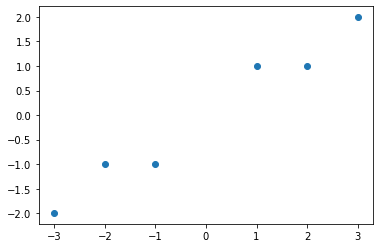

In [17]:
from sklearn.decomposition import PCA #import PCA
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]) #dummy example

plt.scatter(X[:,0],X[:,1])#plot data

[Scikit Learn PCA Docs: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

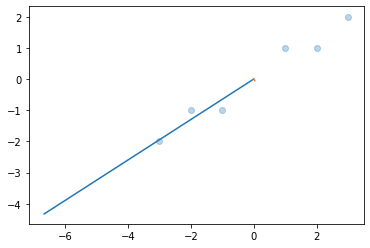

In [18]:
pca = PCA(n_components=2) #PCA instance with cut-off at 2 dims
pca.fit(X) #compute new base
X_new = pca.transform(X) #apply base chage to data

#plotting eigenvectors and values
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp *var
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
    )
    

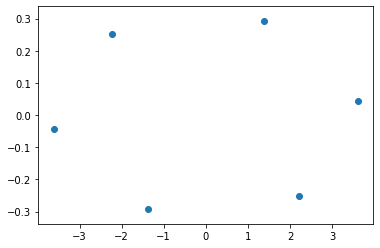

In [19]:
# Plotting in new base
plt.scatter(X_new[:,0],X_new[:,1])#plot data

### Example: MNIST

In [23]:
#down load MNIST
from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X.shape

(70000, 784)

3


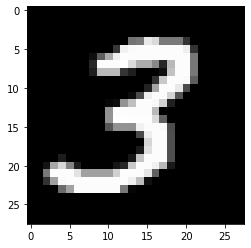

In [30]:
#show image
plt.gray()
plt.imshow(X[135].reshape(28,28))
print(y[135])

In [22]:
pca = PCA()# no dim limit
pca.fit(X)

PCA()

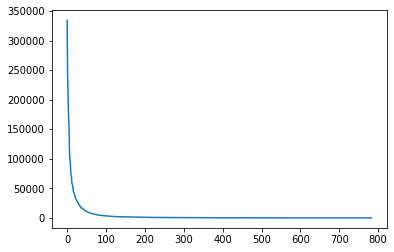

In [28]:
#plot Eigen-Values
plt.plot(pca.explained_variance_)

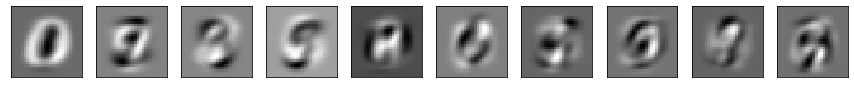

In [29]:
#have look at the first 10 Eigen-Vectors
fig, ax = plt.subplots(1, 10, figsize=(15,15))
for i in range(10):
    ax[i].imshow(pca.components_[i].reshape(28,28))
    ax[i].set_yticks([])
    ax[i].set_xticks([])

In [31]:
# transform singe sample
s = pca.transform(X[135].reshape(1, -1)) #tricky: SKL PCA expects multiple matrix of samples

In [38]:
#manual reconstruct
s_new = s[0,0]*pca.components_[0].reshape(28,28)
for i in range(1,10):
    s_new+=s[0,i]*pca.components_[i].reshape(28,28)

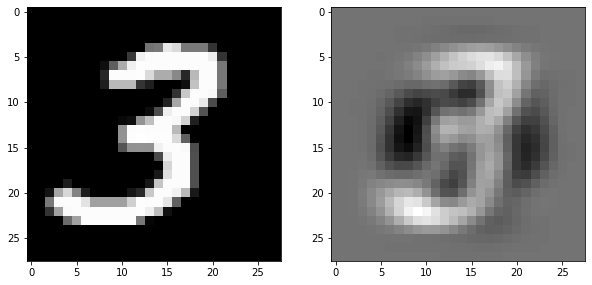

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(X[135].reshape(28,28))
ax[1].imshow(s_new)

## Non-Linear PCA
#### so far, *only* linear decomposition
* what about non-convex data distributions ?

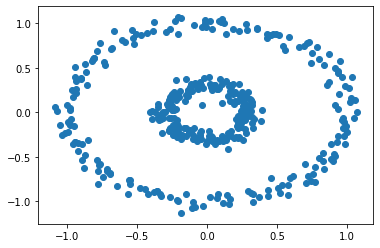

In [40]:
from sklearn.datasets import make_circles
X, y = X, y = make_circles(n_samples=400, factor=0.3, noise=0.05)
plt.scatter(X[:,0],X[:,1])

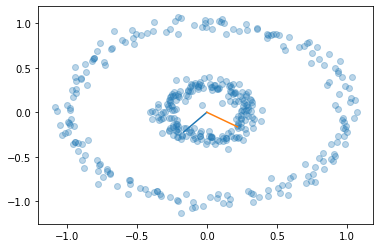

In [41]:
pca = PCA()
pca.fit(X)
X_new = pca.transform(X) #apply base chage to data

#plotting eigenvectors and values
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp *var
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
    )

### Kernel-PCA
* ***Kernel Trick***: apply simple non-linear transformations before PCA
* typical kernels:
    * Linear: $<x_i,x_j>$
    * Polynom: $<x_i,x_j>^d$
    * RBF (or Gauss): $e^{\gamma\|x_i - x_j\|^2}$
    * ... many more using prior knowledge of the problem

In [48]:
from sklearn.decomposition import KernelPCA
#kpca=KernelPCA(kernel='linear')
kpca=KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10 )
#kpca=KernelPCA(kernel="poly", fit_inverse_transform=True, degree= )

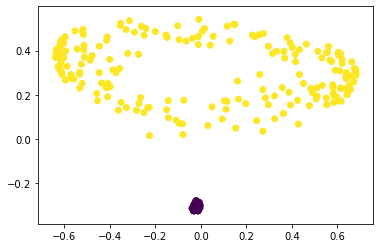

In [49]:
X_new = kpca.fit_transform(X) #apply base chage to data

plt.scatter(X_new[:,0],X_new[:,1], c=y, cmap='viridis')

## t-SNE
#### *t-distributed stochastic neighbor embedding*

* non-linear dimension reduction method (like Kernel-PCA)
    * output usually fixed to 2D or 3D
* mostly use for visualization -> "*looks good*" 
    * not for pre-processing like (k)PCA

### Example: MNIST

<img src="IMG/tsne-pca.png">

#### t-SNE in a nutshell:
* Step I - probabilistic motivation: estimating the probability that two data points are *similar*, both in the original, high-dimensional space, als well as in the 2D target space:
    * input: $p_{j\mid i} = \frac{\exp(-\lVert\mathbf{x}_i - \mathbf{x}_j\rVert^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\lVert\mathbf{x}_i - \mathbf{x}_k\rVert^2 / 2\sigma_i^2)}$ - using a ***Normal***-Distribution
    * Output: $q_{ij} = \frac{(1 + \lVert \mathbf{y}_i - \mathbf{y}_j\rVert^2)^{-1}}{\sum_k \sum_{l \neq k} (1 + \lVert \mathbf{y}_k - \mathbf{y}_l\rVert^2)^{-1}}$ - using a ***t-Student*** Distribution
* optimization problem: minimize KL-Divergence between input and output:
    * $\mathrm{KL}\left(P \parallel Q\right) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}$
    * solved via gradient descent methods -> adjust $\mathbf{y}_i$

## PCA and t-SNE Visualization Tools

<img src="IMG/projector.png" width=1000>

#### [https://projector.tensorflow.org/](https://projector.tensorflow.org/)

### more PCA and t-SNE in the lab ....